## Classification of Iris data using Linear Discriminant Analysis (LDA)

In [9]:
# necessary import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [10]:
# read dataset from URL
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
cls = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
dataset = pd.read_csv(url, names=cls)

In [11]:
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [12]:
dataset.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [13]:
dataset.isna().sum()   

sepal-length    0
sepal-width     0
petal-length    0
petal-width     0
Class           0
dtype: int64

In [17]:
dataset.shape[1]

5

***No null values in dataset***

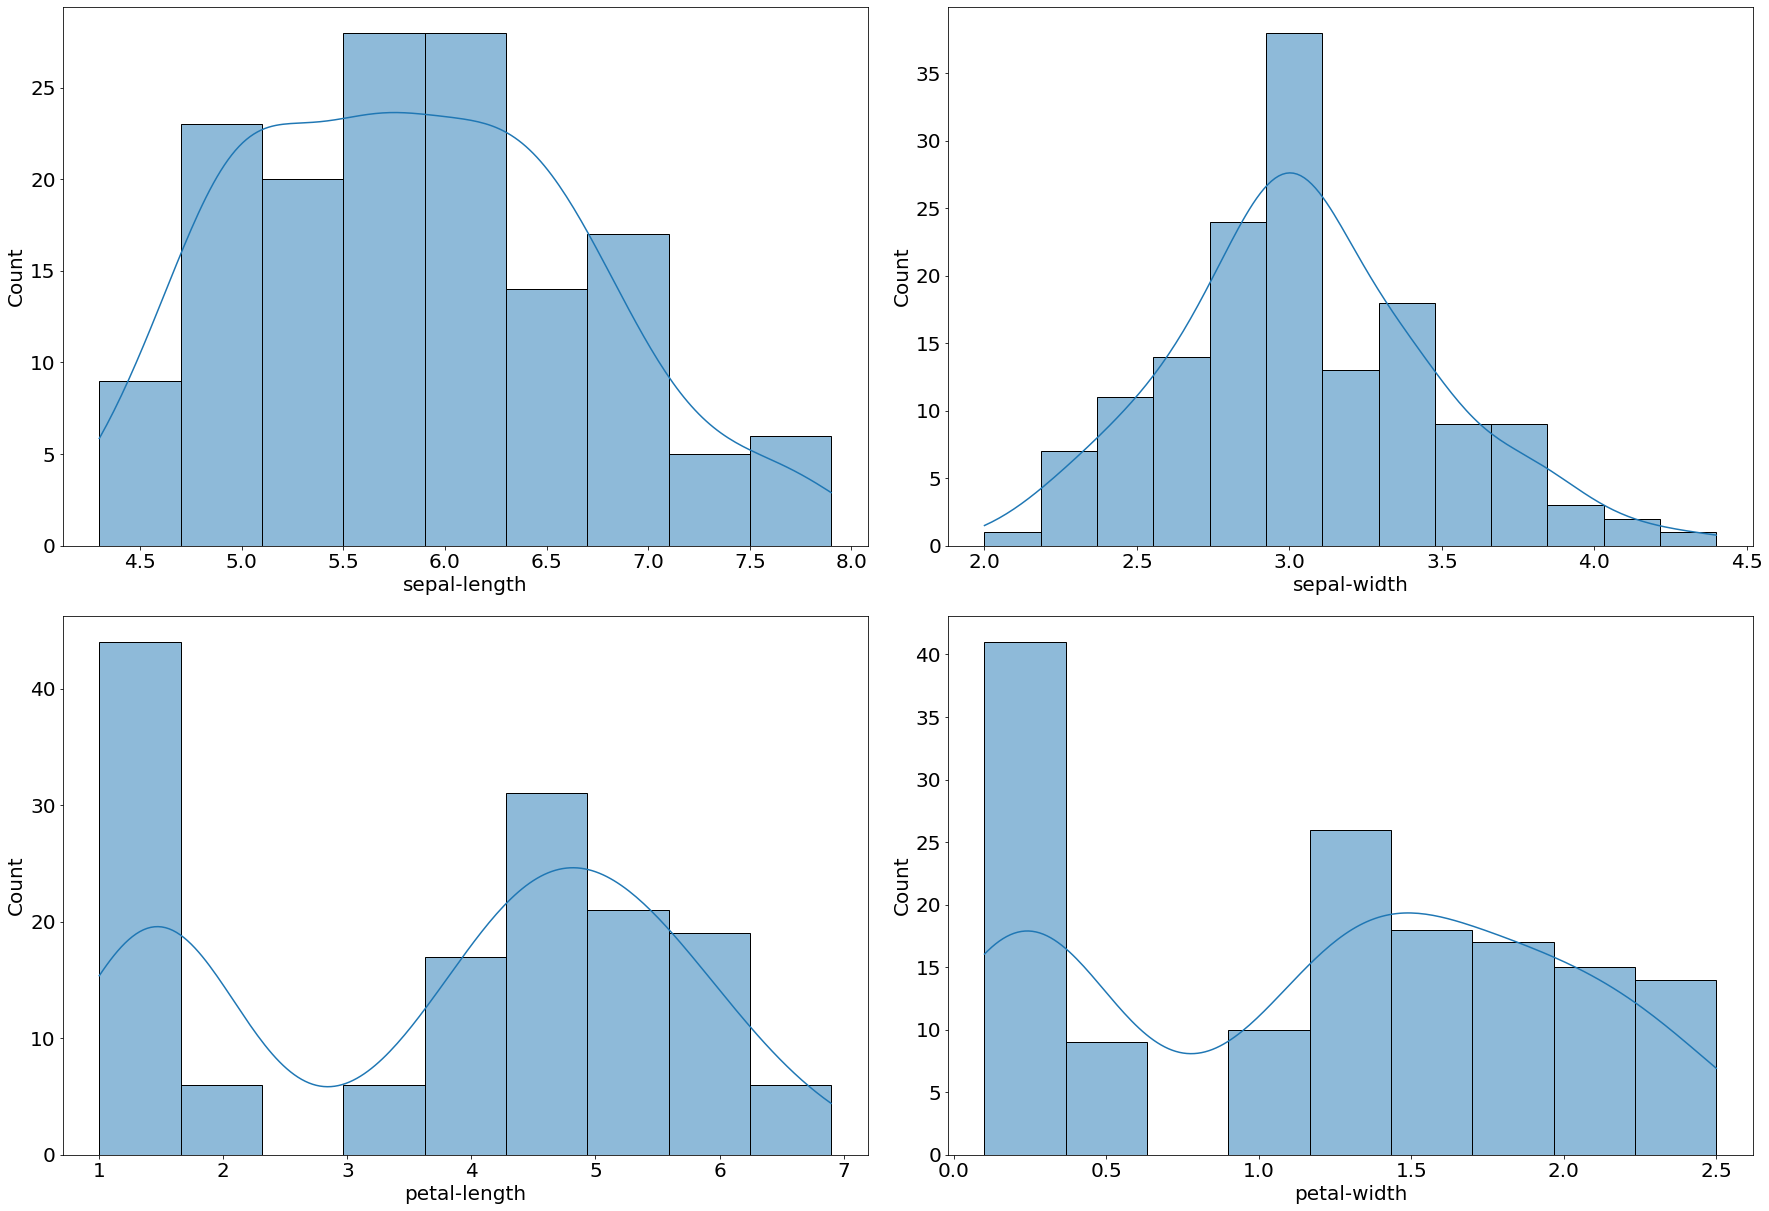

In [20]:
import seaborn as sns

plt.figure(figsize=(25,25))
plt.rcParams.update({'font.size':20})
for i, column in enumerate(dataset.columns):
    if i < dataset.shape[1]-1:
        plt.subplot(3,2, i+1)
        sns.histplot(data=dataset[column],kde=True)
plt.tight_layout()
plt.show()

#### Above panel shows the distribution for the predictor variable

In [21]:
# divide the dataset into class and target variable
X = dataset.iloc[:, 0:4].values
y = dataset.iloc[:, 4].values

In [22]:
sc = StandardScaler()
X = sc.fit_transform(X)
le = LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [23]:
# apply Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis(n_components=2)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

Text(0, 0.5, 'Y')

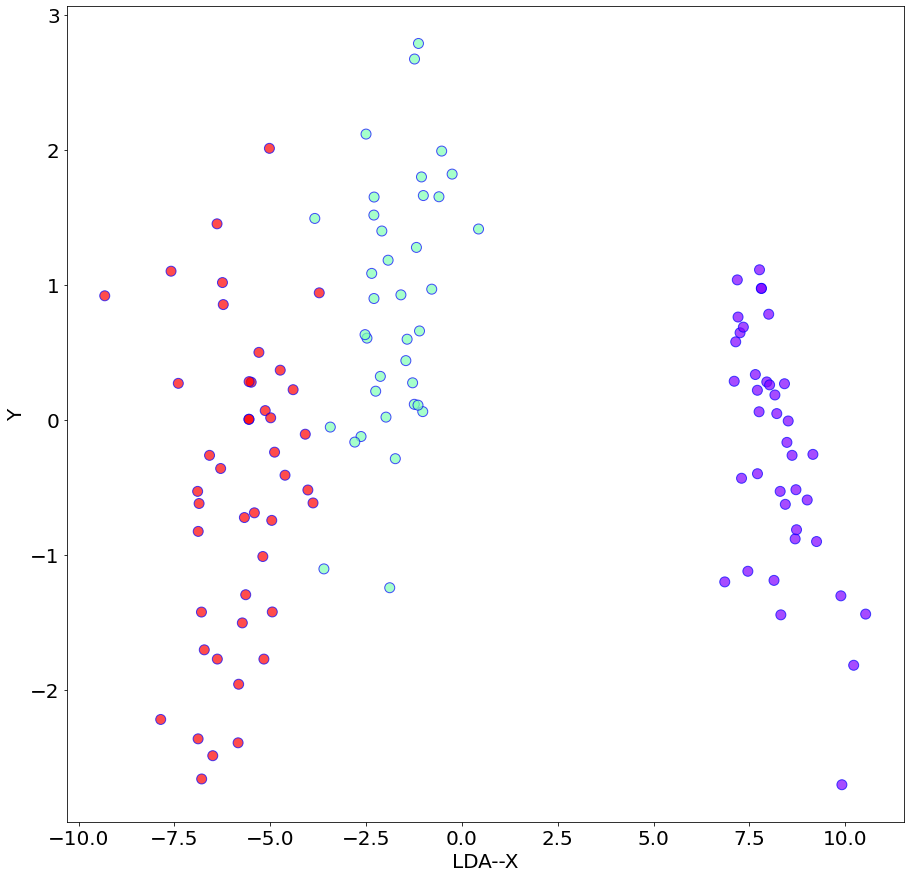

In [30]:
# plot the scatterplot
plt.figure(figsize=(15,15))
plt.rcParams.update({'font.size':20})
plt.scatter(
    X_train[:,0],X_train[:,1],c=y_train,cmap='rainbow',
  alpha=0.7,edgecolors='b',s=100
)
plt.xlabel('LDA--X')
plt.ylabel('Y')

In [32]:
# classify using random forest classifier
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [33]:
# print the accuracy and confusion matrix
print('Accuracy : ' + str(accuracy_score(y_test, y_pred)))
conf_m = confusion_matrix(y_test, y_pred)
print(conf_m)

Accuracy : 0.9333333333333333
[[10  1  0]
 [ 0 12  1]
 [ 0  0  6]]


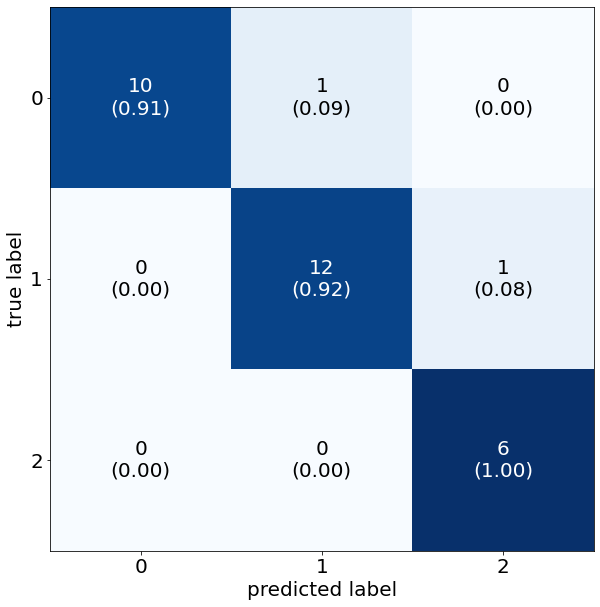

In [35]:
from mlxtend.plotting import plot_confusion_matrix

plot_confusion_matrix(conf_mat = conf_m,figsize=(10,10),show_normed=True)
plt.show()